In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/adityasyam/grg_pheno_sim') 

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import normalize
from grg_pheno_sim.phenotype import convert_to_phen

from test_phenotype_sim.phenotype_test import test_variance


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
echo "Test"
grg construct --no-maf-flip -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg

Construction took 39 ms
Wrote GRG to test-200-samples.vcf.gz.part0.tree0.grg in 0 ms
Construction took 54 ms
Wrote GRG to test-200-samples.vcf.gz.part0.tree1.grg in 0 ms
Construction took 0 ms
Mapping mutations took264 ms
Wrote GRG to test-200-samples.vcf.gz.part0.grg in 6 ms
Construction took 44 ms
Wrote GRG to test-200-samples.vcf.gz.part1.tree0.grg in 0 ms
Construction took 49 ms
Wrote GRG to test-200-samples.vcf.gz.part1.tree1.grg in 0 ms
Construction took 0 ms
Mapping mutations took324 ms
Wrote GRG to test-200-samples.vcf.gz.part1.grg in 3 ms
Construction took 52 ms
Wrote GRG to test-200-samples.vcf.gz.part2.tree0.grg in 0 ms
Construction took 48 ms
Wrote GRG to test-200-samples.vcf.gz.part2.tree1.grg in 0 ms
Construction took 0 ms
Mapping mutations took436 ms
Wrote GRG to test-200-samples.vcf.gz.part2.grg in 4 ms
Construction took 60 ms
Wrote GRG to test-200-samples.vcf.gz.part3.tree0.grg in 0 ms
Construction took 54 ms
Wrote GRG to test-200-samples.vcf.gz.part3.tree1.grg in 0 ms

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


In [4]:
rng = np.random.default_rng()

mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [ 3.95155874e-01 -2.44852330e-01  3.03233870e-01  8.94170915e-01
 -7.36930982e-01  5.85131631e-01 -1.82966374e+00  3.04723113e-01
  5.83484351e-01  1.08128589e+00  3.63190802e-01 -7.97695888e-01
 -2.26546088e+00 -1.08633526e+00 -2.63833278e-01 -1.52329922e-01
  7.79955981e-01  2.20750703e-01 -3.71787993e-01  8.70449986e-01
 -2.70975639e-01 -1.70126953e+00  4.24350170e-02 -1.03421676e+00
  9.74366579e-01 -7.99205658e-02 -1.06599473e+00 -1.98138142e+00
 -1.28616169e+00 -1.79656268e+00 -6.44324895e-01 -6.46721933e-01
 -5.82029519e-01 -2.34940161e-01  8.50294028e-01 -5.52914427e-01
  1.07021469e+00 -3.96886267e-01  1.82424790e+00  2.09442677e+00
  6.07191295e-01 -1.87283985e-01  2.73928858e-02 -8.49634637e-01
 -1.22506811e+00 -1.11802857e+00 -1.02205311e+00 -1.28457992e+00
  1.19085189e+00 -9.20088867e-01  3.83381346e-01 -7.48843511e-02
 -1.11056663e-01 -5.20504296e-01  4.47785913e-01 -3.47821189e-03
  3.64558394e-01 -7.04542225e-01 -1.14200528e+00 -5.82772216e-01
 

In [5]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal, random_seed=1)
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)

In [6]:
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #non-normalized genetic value df
individual_genetic_value_df

,individual_id,genetic_value,causal_mutation_id
0,0,-16.501664,0
1,1,-2.454348,0
2,2,-17.303803,0
3,3,6.641214,0
4,4,-8.710213,0
...,...,...,...
195,195,12.536488,0
196,196,16.549154,0
197,197,5.463626,0
198,198,-0.663779,0


We first show how to simulate environmental noise before the genetic values have been normalized, with a narrow-sense heritability of 0.5.

In [7]:
phenotypes = sim_env_noise(individual_genetic_value_df, h2=0.5) #simulating environmental noise without normalizing genetic values
phenotype_df = phenotypes.phenotype_df
phenotype_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,-5.800280,-22.301944
1,0,1,-2.454348,4.758518,2.304170
2,0,2,-17.303803,-13.113032,-30.416835
3,0,3,6.641214,-9.392632,-2.751419
4,0,4,-8.710213,17.171014,8.460801
...,...,...,...,...,...
195,0,195,12.536488,-6.010642,6.525847
196,0,196,16.549154,14.912576,31.461730
197,0,197,5.463626,0.590227,6.053853
198,0,198,-0.663779,-26.984494,-27.648273


In [8]:
h2_used = phenotypes.get_h2() #showing the h2 factor used, can be acccessed since it is a class attribute of phenotypes
print(h2_used)

[0.5]


In [9]:
phenotype_df = normalize(phenotypes)
test1 = test_variance(phenotype_df)
print("Variance of the phenotypes is " + str(phenotype_df['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df['environmental_noise'].var()))
print(test1)   #tests the variance condition in the phenotypic data, expected value close to zero
phenotype_df

Variance of the phenotypes is 0.9999999999999999
Variance of the genetic values is 0.5107368671672109
Variance of the noise is 0.5496553085611857
-0.06039217572839661


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.268403,-0.327471,-0.595874
1,0,1,0.490531,0.242989,0.733521
2,0,2,-0.311740,-0.722557,-1.034297
3,0,3,0.981937,-0.521555,0.460382
4,0,4,0.152546,0.913599,1.066145
...,...,...,...,...,...
195,0,195,1.300442,-0.338836,0.961605
196,0,196,1.517234,0.791583,2.308816
197,0,197,0.918316,0.017789,0.936105
198,0,198,0.587271,-1.471991,-0.884720


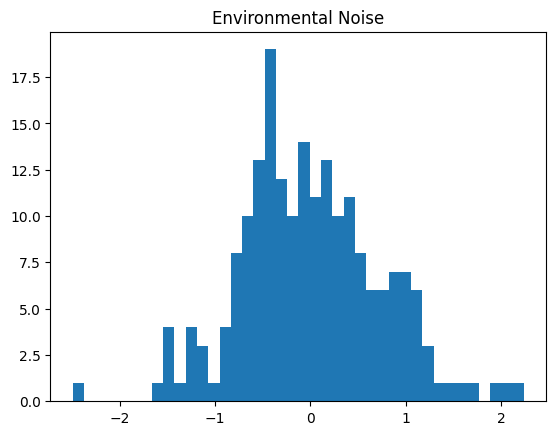

Mean of noise: 8.881784197001253e-18
Standard deviation of noise: 0.7413874213669839


In [10]:

plt.hist(phenotype_df["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df['environmental_noise'].std()))

Now, we show a sample where zero noise is simulated (h2=1) by default.

In [11]:
phenotypes_zero_noise = sim_env_noise(individual_genetic_value_df) #simulating environmental noise without normalizing genetic values
phenotype_df_zero_noise = phenotypes_zero_noise.phenotype_df
phenotype_df_zero_noise

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,0.0,-16.501664
1,0,1,-2.454348,0.0,-2.454348
2,0,2,-17.303803,0.0,-17.303803
3,0,3,6.641214,0.0,6.641214
4,0,4,-8.710213,0.0,-8.710213
...,...,...,...,...,...
195,0,195,12.536488,0.0,12.536488
196,0,196,16.549154,0.0,16.549154
197,0,197,5.463626,0.0,5.463626
198,0,198,-0.663779,0.0,-0.663779


In [12]:
phenotype_df_zero_noise = normalize(phenotypes_zero_noise)
print("Variance of the phenotypes is " + str(phenotype_df_zero_noise['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_zero_noise['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_zero_noise['environmental_noise'].var()))
phenotype_df_zero_noise

Variance of the phenotypes is 1.0
Variance of the genetic values is 174.97473363027564
Variance of the noise is 0.0


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,0.0,-0.375568
1,0,1,-2.454348,0.0,0.686386
2,0,2,-17.303803,0.0,-0.436209
3,0,3,6.641214,0.0,1.373995
4,0,4,-8.710213,0.0,0.213453
...,...,...,...,...,...
195,0,195,12.536488,0.0,1.819668
196,0,196,16.549154,0.0,2.123019
197,0,197,5.463626,0.0,1.284972
198,0,198,-0.663779,0.0,0.821750


In [13]:
phenotype_df_zero_noise_genetic_normalize = normalize(phenotypes_zero_noise, normalize_genetic_values=True)
print("Variance of the phenotypes is " + str(phenotype_df_zero_noise_genetic_normalize['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_zero_noise_genetic_normalize['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_zero_noise_genetic_normalize['environmental_noise'].var()))
phenotype_df_zero_noise_genetic_normalize


Variance of the phenotypes is 1.0
Variance of the genetic values is 1.0
Variance of the noise is 0.0


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.375568,0.0,-0.375568
1,0,1,0.686386,0.0,0.686386
2,0,2,-0.436209,0.0,-0.436209
3,0,3,1.373995,0.0,1.373995
4,0,4,0.213453,0.0,0.213453
...,...,...,...,...,...
195,0,195,1.819668,0.0,1.819668
196,0,196,2.123019,0.0,2.123019
197,0,197,1.284972,0.0,1.284972
198,0,198,0.821750,0.0,0.821750


Now, we simulate environmental noise before the genetic values have been normalized, with user defined noise. If user_defined is set to True, the user must specify mean and std values to be simulated from.

In [14]:
phenotype_non_normalized_user_defined = sim_env_noise(individual_genetic_value_df, user_defined=True, mean=0, std=1) #simulating standard noise on the non-normalized genetic values
phenotype_df_non_normalized_user_defined = phenotype_non_normalized_user_defined.phenotype_df
phenotype_df_non_normalized_user_defined

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,-0.283078,-16.784742
1,0,1,-2.454348,1.972745,-0.481603
2,0,2,-17.303803,-0.485856,-17.789659
3,0,3,6.641214,-1.516150,5.125063
4,0,4,-8.710213,0.745922,-7.964290
...,...,...,...,...,...
195,0,195,12.536488,1.241413,13.777902
196,0,196,16.549154,-0.267551,16.281603
197,0,197,5.463626,0.694643,6.158269
198,0,198,-0.663779,-0.618554,-1.282333


The user can choose to view the h2 narrow sense heritability factor for the user-defined noise as well.

In [15]:
h2_user_defined = phenotype_non_normalized_user_defined.get_h2()
print(h2_user_defined)

0.9880754804368664


In [16]:
phenotype_df_non_normalized_user_defined = normalize(phenotype_non_normalized_user_defined)
print("Variance of the phenotypes is " + str(phenotype_df_non_normalized_user_defined['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_non_normalized_user_defined['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_non_normalized_user_defined['environmental_noise'].var()))
phenotype_df_non_normalized_user_defined

Variance of the phenotypes is 1.0
Variance of the genetic values is 0.9824705959762574
Variance of the noise is 0.005604884460608964


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.372262,-0.017061,-0.389323
1,0,1,0.680343,0.151974,0.832318
2,0,2,-0.432368,-0.032256,-0.464624
3,0,3,1.361899,-0.109459,1.252441
4,0,4,0.211574,0.060045,0.271619
...,...,...,...,...,...
195,0,195,1.803649,0.097174,1.900822
196,0,196,2.104329,-0.015897,2.088432
197,0,197,1.273659,0.056202,1.329862
198,0,198,0.814516,-0.042199,0.772317


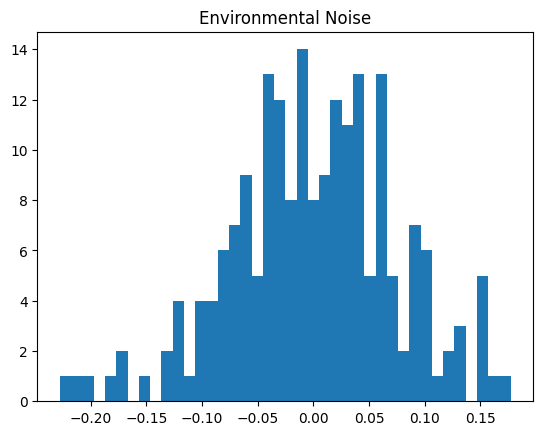

Mean of noise: -2.7755575615628915e-18
Standard deviation of noise: 0.07486577629737745


In [17]:

plt.hist(phenotype_df_non_normalized_user_defined["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_non_normalized_user_defined['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_non_normalized_user_defined['environmental_noise'].std()))

The user could also define a custom distribution to simulate environmental noise from.

In [18]:
genetic_val_df_normalized = normalize_genetic_values(individual_genetic_value_df) #normalized genetic value df
genetic_val_df_normalized

,individual_id,genetic_value,causal_mutation_id
0,0,-0.375568,0
1,1,0.686386,0
2,2,-0.436209,0
3,3,1.373995,0
4,4,0.213453,0
...,...,...,...
195,195,1.819668,0
196,196,2.123019,0
197,197,1.284972,0
198,198,0.821750,0


We now show how to simulate environmental noise after the genetic values have been normalized, with a narrow-sense heritability of 0.25.

In [19]:
phenotype_post_normalization_h2 = sim_env_noise(genetic_val_df_normalized, h2=0.25) #simulating noise after genetic values have been normalized
phenotype_df_post_normalization_h2 = phenotype_post_normalization_h2.phenotype_df
phenotype_df_post_normalization_h2

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.375568,0.405828,0.030260
1,0,1,0.686386,-0.838572,-0.152186
2,0,2,-0.436209,0.570399,0.134191
3,0,3,1.373995,-2.939031,-1.565035
4,0,4,0.213453,0.905812,1.119265
...,...,...,...,...,...
195,0,195,1.819668,-0.671716,1.147952
196,0,196,2.123019,2.368114,4.491133
197,0,197,1.284972,2.329656,3.614628
198,0,198,0.821750,-0.038076,0.783674


In [20]:
phenotype_df_post_normalization_h2 = normalize(phenotype_post_normalization_h2)
print("Variance of the phenotypes is " + str(phenotype_df_post_normalization_h2['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_post_normalization_h2['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_post_normalization_h2['environmental_noise'].var()))
test3 = test_variance(phenotype_df_post_normalization_h2)
print(test3)  #tests the variance condition in the phenotypic data, expected value is close to zero
phenotype_df_post_normalization_h2

Variance of the phenotypes is 0.9999999999999997
Variance of the genetic values is 0.25712627802358057
Variance of the noise is 0.7222494769115818
0.020624245064837288


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.190442,0.223551,0.033109
1,0,1,0.348050,-0.407455,-0.059405
2,0,2,-0.221191,0.307001,0.085810
3,0,3,0.696720,-1.472548,-0.775828
4,0,4,0.108237,0.477080,0.585317
...,...,...,...,...,...
195,0,195,0.922711,-0.322847,0.599864
196,0,196,1.076533,1.218579,2.295112
197,0,197,0.651579,1.199078,1.850656
198,0,198,0.416690,-0.001543,0.415147


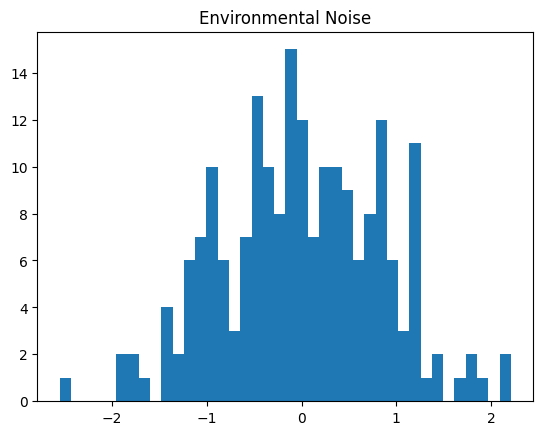

Mean of noise: -1.7763568394002505e-17
Standard deviation of noise: 0.8498526207005435


In [21]:

plt.hist(phenotype_df_post_normalization_h2["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_post_normalization_h2['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_post_normalization_h2['environmental_noise'].std()))

We finally show how to simulate environmental noise after the genetic values have been normalized, with a narrow-sense heritability of 1 (default case) and user defined cases for the noise.

In [22]:
phenotype_post_normalization_default_mean_and_std = sim_env_noise(genetic_val_df_normalized, user_defined=True, mean=0, std=1) #simulating noise after genetic values have been normalized with h2=1 and user defined with standard mean and std
phenotype_df_post_normalization_default_mean_and_std = phenotype_post_normalization_default_mean_and_std.phenotype_df
phenotype_df_post_normalization_default_mean_and_std

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.375568,-0.238367,-0.613935
1,0,1,0.686386,-0.835387,-0.149001
2,0,2,-0.436209,1.017540,0.581332
3,0,3,1.373995,-1.421176,-0.047181
4,0,4,0.213453,0.059995,0.273448
...,...,...,...,...,...
195,0,195,1.819668,-0.533327,1.286342
196,0,196,2.123019,-0.624718,1.498301
197,0,197,1.284972,0.581157,1.866129
198,0,198,0.821750,-0.802932,0.018817


In [23]:
phenotype_df_post_normalization_default_mean_and_std = normalize(phenotype_post_normalization_default_mean_and_std)
print("Variance of the phenotypes is " + str(phenotype_df_post_normalization_default_mean_and_std['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_post_normalization_default_mean_and_std['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_post_normalization_default_mean_and_std['environmental_noise'].var()))
phenotype_df_post_normalization_default_mean_and_std

Variance of the phenotypes is 1.0
Variance of the genetic values is 0.5016812149178884
Variance of the noise is 0.4392208397209757


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.266013,-0.150199,-0.416212
1,0,1,0.486163,-0.573065,-0.086902
2,0,2,-0.308964,0.739353,0.430389
3,0,3,0.973193,-0.987977,-0.014783
4,0,4,0.151187,0.061129,0.212316
...,...,...,...,...,...
195,0,195,1.288861,-0.359118,0.929743
196,0,196,1.503723,-0.423850,1.079873
197,0,197,0.910138,0.430265,1.340403
198,0,198,0.582041,-0.550078,0.031963


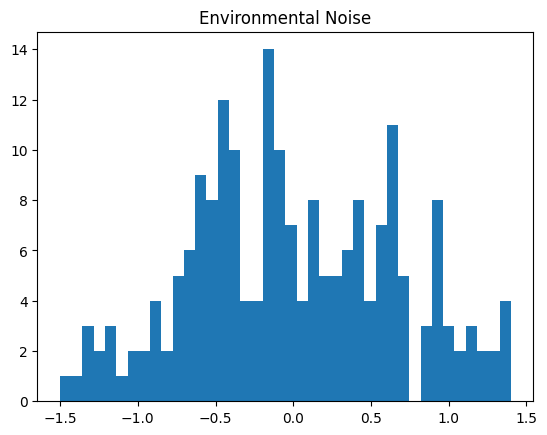

Mean of noise: 2.997602166487923e-17
Standard deviation of noise: 0.6627373836754463


In [24]:

plt.hist(phenotype_df_post_normalization_default_mean_and_std["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_post_normalization_default_mean_and_std['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_post_normalization_default_mean_and_std['environmental_noise'].std()))

In [25]:
phenotype_post_normalization_unique_mean_and_std = sim_env_noise(genetic_val_df_normalized, user_defined=True, mean=1, std=2) #simulating noise after genetic values have been normalized with h2=1 and user defined mean and std
phenotype_df_post_normalization_unique_mean_and_std = phenotype_post_normalization_unique_mean_and_std.phenotype_df
phenotype_df_post_normalization_unique_mean_and_std

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.375568,-2.279305,-2.654873
1,0,1,0.686386,1.596971,2.283357
2,0,2,-0.436209,0.174129,-0.262080
3,0,3,1.373995,2.095533,3.469528
4,0,4,0.213453,0.904949,1.118401
...,...,...,...,...,...
195,0,195,1.819668,5.215103,7.034771
196,0,196,2.123019,-0.979754,1.143265
197,0,197,1.284972,0.876365,2.161337
198,0,198,0.821750,-0.614931,0.206819


In [26]:
phenotype_df_post_normalization_unique_mean_and_std = normalize(phenotype_post_normalization_unique_mean_and_std)
print("Variance of the phenotypes is " + str(phenotype_df_post_normalization_unique_mean_and_std['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_post_normalization_unique_mean_and_std['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_post_normalization_unique_mean_and_std['environmental_noise'].var()))
test5 = test_variance(phenotype_df_post_normalization_unique_mean_and_std)
phenotype_df_post_normalization_unique_mean_and_std

Variance of the phenotypes is 1.0000000000000002
Variance of the genetic values is 0.21353834548058612
Variance of the noise is 0.7313500592841796


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.173551,-1.490037,-1.663588
1,0,1,0.317180,0.301198,0.618379
2,0,2,-0.201573,-0.356300,-0.557873
3,0,3,0.634926,0.531585,1.166511
4,0,4,0.098637,-0.018587,0.080050
...,...,...,...,...,...
195,0,195,0.840873,1.973145,2.814017
196,0,196,0.981052,-0.889512,0.091540
197,0,197,0.593788,-0.031795,0.561993
198,0,198,0.379732,-0.720926,-0.341194


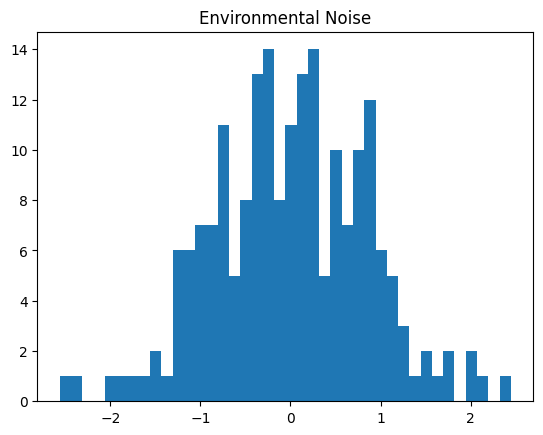

Mean of noise: -3.663735981263017e-17
Standard deviation of noise: 0.8551900720215241


In [27]:

plt.hist(phenotype_df_post_normalization_unique_mean_and_std["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_post_normalization_unique_mean_and_std['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_post_normalization_unique_mean_and_std['environmental_noise'].std()))

We show an example of converting the final phenotypes output to a standard .phen file format to be saved in the local directory.

In [28]:
local_path = 'post_noise_phenotypes.phen' #will be saved in a .phen file of this name in the local directory.
convert_to_phen(phenotype_df_post_normalization_unique_mean_and_std, local_path, include_header=True)